In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("ReidentificationTests.csv")

In [25]:
from Utils.constant import MODELS
from Utils.constant import PLACES

def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x)*100, string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    print(title)
    probe_places = 'Ayagaures'
    gallery_places = 'ParqueSur'
    print("[ ### Probe: %s - Gallery: %s  ###]" %(probe_places, gallery_places))
    for model in set(df['Identification_Model'][:]):
        df_model = filterData(df,
        'Identification_Model == "%s" and Probe_place == "%s" '
        'and Gallery_place == "%s"' % (model, probe_places, gallery_places))
        for index in range(len(df_model)):
            colum: pd.DataFrame = df.iloc[index]
            label: str = colum['Metric']
            cmc = stringToLst(colum["Values"])
            plt.plot(cmc, label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión (%)")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title("model: %s | Probe: %s - Gallery: %s" %(model, probe_places, gallery_places))
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAP']])

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

RetinaFace
[ ### Probe: Ayagaures - Gallery: PresaDeHornos  ###]
VGG-Face


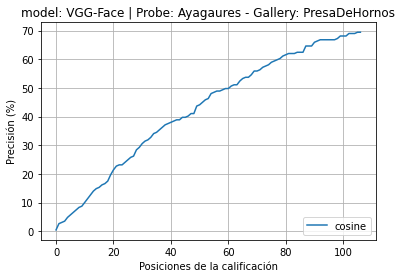

KeyError: "['mAPtop1', 'mAPtop5'] not in index"

In [5]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

In [ ]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

In [ ]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

In [ ]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

## Aligned

In [26]:
plotCMC(data, 'Face_Model == "AlignedReId"', "AlignedReId")

AlignedReId
[ ### Probe: Ayagaures - Gallery: ParqueSur  ###]
ResNet50
Empty DataFrame
Columns: [Metric, mAP]
Index: []


In [ ]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
from Utils.fileUtils import getNumber
import os

def TSNE_plot(data, classes):
  X_embedded = TSNE(n_components=2).fit_transform(data)
  plt.scatter(X_embedded[:,0], X_embedded[:,1], c = classes)
  plt.show()

with open('../TGC_places/PresaDeHornos/representations_vgg_face.pkl', 'rb') as f:
    data = pickle.load(f)
embedding = np.array([a[1]  for a in data])
runners = [getNumber(os.path.basename(a[0])) for a in data]
TSNE_plot(embedding, runners)